In [1]:
import music21

In [2]:
from encode_data import *

Failed to load FluidSynth. Must install if you want to convert to wav files.


In [22]:
def stream2str(stream, short=True, continuous=False):
    s_arr = stream2chordarr(stream) # 2.
    seq = chordarr2seq(s_arr)
    def note_func(note):
        if continuous: return note.continuous_repr(short=short)
        return note.duration_repr(short=short)
    return seq2str(seq, note_func=note_func, continuous=continuous)
    

### Single notes

In [3]:
s1 = music21.stream.Stream()
s1.append(music21.note.Note('C#4', type='half'))
s1.append(music21.note.Note('D5', type='quarter'))
s1.duration.quarterLength

3.0

In [4]:
s1.show('text')

{0.0} <music21.note.Note C#>
{2.0} <music21.note.Note D>


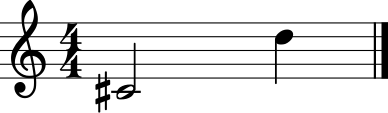

In [5]:
s1.show()

### Continuous = True
This means every beat is separated by a `||`  
Every note is followed by a `t-1` or `t-2`  
`t-1` = note strike  
`t-2` = note continuation from previous  

In [23]:
stream2str(s1, continuous=True)

'nC#4 t-1 || nC#4 t-2 || nC#4 t-2 || nC#4 t-2 || nC#4 t-2 || nC#4 t-2 || nC#4 t-2 || nC#4 t-2 || nD5 t-1 || nD5 t-2 || nD5 t-2 || nD5 t-2 || ||'

### Continuous = False
Notes are followed by `tX` - `X` represents the number of beats played  
Beat separators are condensed if no beat is played in between. Also followed by a `tX` for number of beats to skip

In [24]:
cont_str = stream2str(s1); cont_str

'|| t0 nC#4 t8 || t7 nD5 t4'

In [25]:
str2stream(cont_str).show('midi')

### Chords

In [29]:
c1 = music21.stream.Stream()
c1.append(music21.chord.Chord(['C', 'E', 'G'], type='quarter'))
c1.append(music21.chord.Chord(['D', 'F'], type='quarter'))
c1.duration.quarterLength

2.0

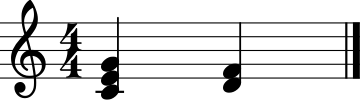

In [30]:
c1.show()

In [33]:
stream2str(s1, continuous=True)

'nC4 t-1 nE4 t-1 nG4 t-1 || nC4 t-2 nE4 t-2 nG4 t-2 || nC4 t-2 nE4 t-2 nG4 t-2 || nC4 t-2 nE4 t-2 nG4 t-2 || nD4 t-1 nF4 t-1 || nD4 t-2 nF4 t-2 || nD4 t-2 nF4 t-2 || nD4 t-2 nF4 t-2 || ||'

In [32]:
cont_str = stream2str(s1, continuous=False); cont_str

'|| t0 nC4 t4 nE4 t4 nG4 t4 || t3 nD4 t4 nF4 t4'